# Federal Reserve Economic Data

Growth
___________________________
- GDP	Gross Domestic Product
- GDPC1	Real Gross Domestic Product
- GDPPOT	Real Potential Gross Domestic Product

Prices and Inflation
________________________________
- CPIAUCSL	Consumer Price Index for All Urban Consumers: All Items
- CPILFESL	Consumer Price Index for All Urban Consumers: All Items Less Food & Energy
- GDPDEF	Gross Domestic Product: Implicit Price Deflator

Money Supply
_______________________________________
- BASE	St. Louis Adjusted Monetary Base
- M1	M1 Money Stock
- M2	M2 Money Stock
- M1V	Velocity of M1 Money Stock
- M2V	Velocity of M2 Money Stock

Interest Rates
______________________________________
- DFF	Effective Federal Funds Rate
- DTB3	3-Month Treasury Bill: Secondary Market Rate
- DGS5	5-Year Treasury Constant Maturity Rate
- DGS10	10-Year Treasury Constant Maturity Rate
- DGS30	30-Year Treasury Constant Maturity Rate
- T5YIE	5-year Breakeven Inflation Rate
- T10YIE	10-year Breakeven Inflation Rate
- T5YIFR	5-Year, 5-Year Forward Inflation Expectation Rate
- TEDRATE	TED Spread
- DPRIME	Bank Prime Loan Rate

Employment
____________________________________________
- UNRATE	Civilian Unemployment Rate
- NROU	Natural Rate of Unemployment (Long-Term)
- NROUST	Natural Rate of Unemployment (Short-Term)
- CIVPART	Civilian Labor Force Participation Rate
- EMRATIO	Civilian Employment-Population Ratio
- UNEMPLOY	Unemployed
- PAYEMS	All Employees: Total nonfarm
- MANEMP	All Employees: Manufacturing
- ICSA	Initial Claims
- IC4WSA	4-Week Moving Average of Initial Claims

Income and Expenditure
____________________________________
- MEHOINUSA672N	Real Median Household Income in the United States
- DSPIC96	Real Disposable Personal Income
- PCE	Personal Consumption Expenditures
- PCEDG	Personal Consumption Expenditures: Durable Goods
- PSAVERT	Personal Saving Rate
- RRSFS	Real Retail and Food Services Sales
- DSPI	Disposable personal income

Other Economic Indicators
____________________________________________
- INDPRO	Industrial Production Index
- TCU	Capacity Utilization: Total Industry
- HOUST	Housing Starts: Total: New Privately Owned Housing Units Started
- GPDI	Gross Private Domestic Investment
- CP	Corporate Profits After Tax (without IVA and CCAdj)
- STLFSI	St. Louis Fed Financial Stress Index
- DCOILWTICO	Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
- USSLIND	Leading Index for the United States
- DTWEXM	Trade Weighted U.S. Dollar Index: Major Currencies
- DTWEXB	Trade Weighted U.S. Dollar Index: Broad

Debt
________________________________
- GFDEBTN	Federal Debt: Total Public Debt
- GFDEGDQ188S	Federal Debt: Total Public Debt as Percent of Gross Domestic Product
- EXCSRESNW	Excess Reserves of Depository Institutions
- TOTCI	Commercial and Industrial Loans, All Commercial Banks

In [12]:

import pandas as pd
import nasdaqdatalink
import numpy as np
import requests
import os

import matplotlib.pyplot as plt
plt.style.use('dark_background')


            Value
Date             
2022-07-11   1.58
2022-07-12   1.58
2022-07-13   1.58
2022-07-14   1.58
2022-07-15   1.58


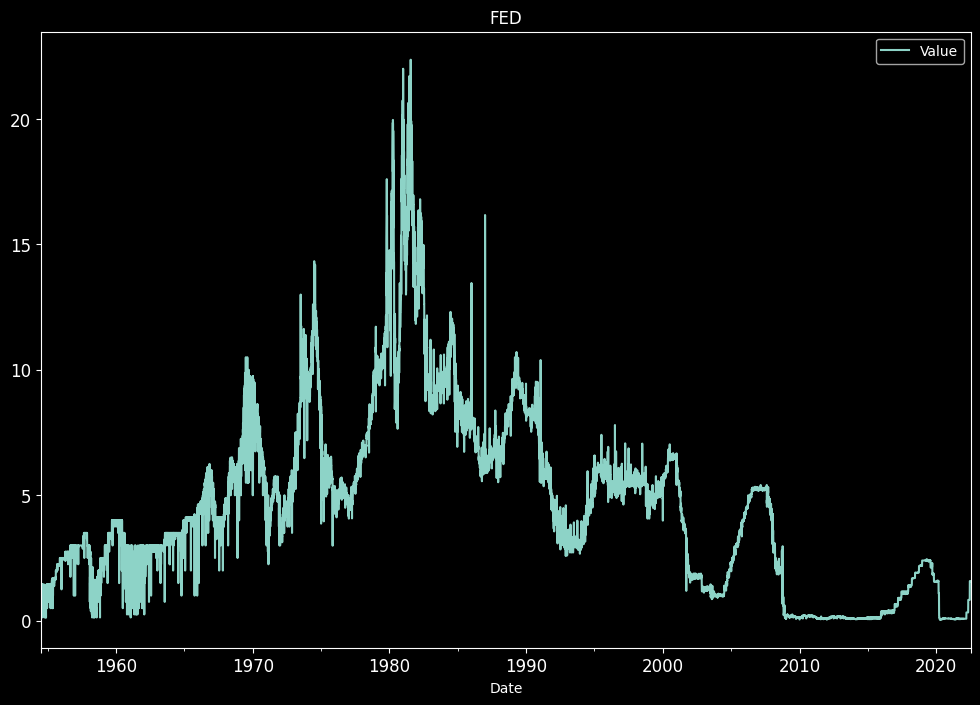

In [13]:
data = nasdaqdatalink.get('FRED/DFF')
df = pd.DataFrame(data)

print(df.tail(5))


df.plot(figsize = (12, 8), title = "FED", fontsize = 12)
plt.show()

# Federal Funds Rate

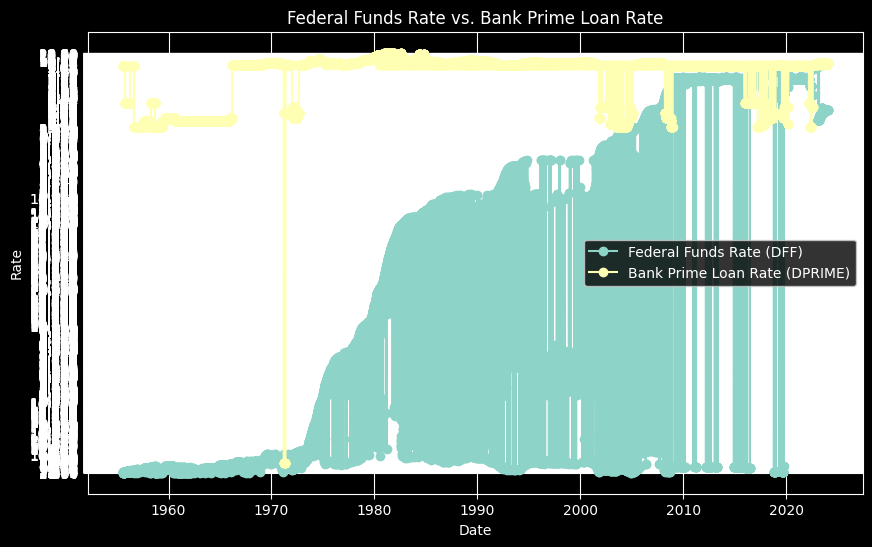

In [17]:

url = "https://api.stlouisfed.org/fred/series/observations"

# Specify the query parameters for DFF (Federal Funds Rate)
params_dff = {
    'series_id': 'DFF',
    'api_key': '976a964605bdb8bed09739ba9b4d8511',
    'file_type': 'json'
}

# Make the GET request for DFF
response_dff = requests.get(url, params=params_dff)
data_dff = response_dff.json()
observations_dff = data_dff['observations']
df_dff = pd.DataFrame(observations_dff, columns=['date', 'value'])
df_dff['date'] = pd.to_datetime(df_dff['date'])

# Specify the query parameters for DPRIME (Bank Prime Loan Rate)
params_dprime = {
    'series_id': 'DPRIME',
    'api_key': '976a964605bdb8bed09739ba9b4d8511',
    'file_type': 'json'
}

# Make the GET request for DPRIME
response_dprime = requests.get(url, params=params_dprime)
data_dprime = response_dprime.json()
observations_dprime = data_dprime['observations']
df_dprime = pd.DataFrame(observations_dprime, columns=['date', 'value'])
df_dprime['date'] = pd.to_datetime(df_dprime['date'])

# Merge dataframes on 'date'
merged_df = pd.merge(df_dff, df_dprime, on='date', how='inner', suffixes=('_DFF', '_DPRIME'))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date'], merged_df['value_DFF'], label='Federal Funds Rate (DFF)', linestyle='-', marker='o')
plt.plot(merged_df['date'], merged_df['value_DPRIME'], label='Bank Prime Loan Rate (DPRIME)', linestyle='-', marker='o')
plt.title('Federal Funds Rate vs. Bank Prime Loan Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
# plt.grid(True)
plt.show()